**Importing** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Datasets and Preprocessing**

#### Analysis of confirmed cases in World and India

In [ ]:
#Confirmed Cases in World and India

world_covid_confirmed=pd.read_csv('/content/time_series_covid19_confirmed_global1.csv')
world_covid_confirmed.drop(columns=['Province/State','Lat','Long'],inplace=True)
India_covid_confirmed=world_covid_confirmed[world_covid_confirmed['Country/Region']=='India']
print(India_covid_confirmed)
world_covid_confirmed

    Country/Region  1/22/20  1/23/20  ...  7/13/20  7/14/20  7/15/20
131          India        0        0  ...   906752   936181   968857

[1 rows x 177 columns]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732,737
262,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526
263,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321,321
264,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643,6695


In [ ]:
#columns

cols=world_covid_confirmed.keys()
cols=cols[1:]
cols

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20'],
      dtype='object', length=176)

In [ ]:
#Access all No.of Confirmed Cases daily in World

world_confirmed=[]
cov_confirmed=world_covid_confirmed.values
for i in range(1,len(cols)+1):
  world_confirmed.append(cov_confirmed[:,i].sum())
world_confirmed=np.array(world_confirmed).reshape(-1,1)
world_confirmed

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78979],
       [   79543],
       [   80396],
       [   81373],
       [   82737],
       [   84114],
       [   86009],
       [   88386],
       [   90360],
       [   92938],
       [   95237],
       [   98028],
       [  101971],
       [  106009],
       [  109960],
       [  113860],
       [  118884],
       [  126547],
       [  132297],
       [  146704],
       [  15

In [ ]:
#Access all Confirmed Cases Daily in India

India_confirmed=[]
ind_confirmed=world_covid_confirmed[world_covid_confirmed['Country/Region']=='India'].values
for i in range(1,len(cols)+1):
  India_confirmed.append(ind_confirmed[:,i].sum())
India_confirmed=np.array(India_confirmed).reshape(-1,1)
India_confirmed

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     5],
       [     5],
       [    28],
       [    30],
       [    31],
       [    34],
       [    39],
       [    43],
       [    56],
       [    62],
       [    73],
       [    82],
       [   102],
       [   113],
       [   119],
       [   142],
       [   156],
       [   194],
       [   244

In [ ]:
#Days

days = np.array([i for i in range(len(world_confirmed))]).reshape(-1, 1)
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
#Converting Dates

dates=pd.to_datetime(cols)
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', length=176, freq=None)

**Graphs**

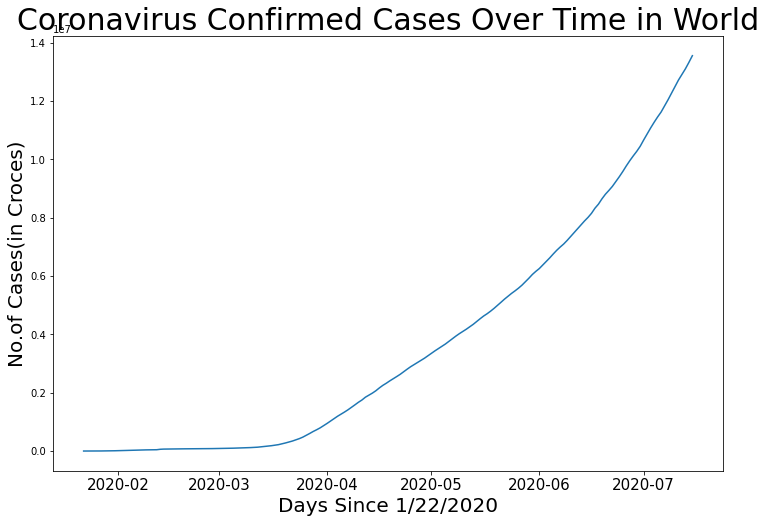

In [ ]:
#Graph for Confirmed Cases in World

plt.figure(figsize=(12, 8))
plt.plot(dates,world_confirmed)
plt.title('Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.xticks(size=15)
plt.show()

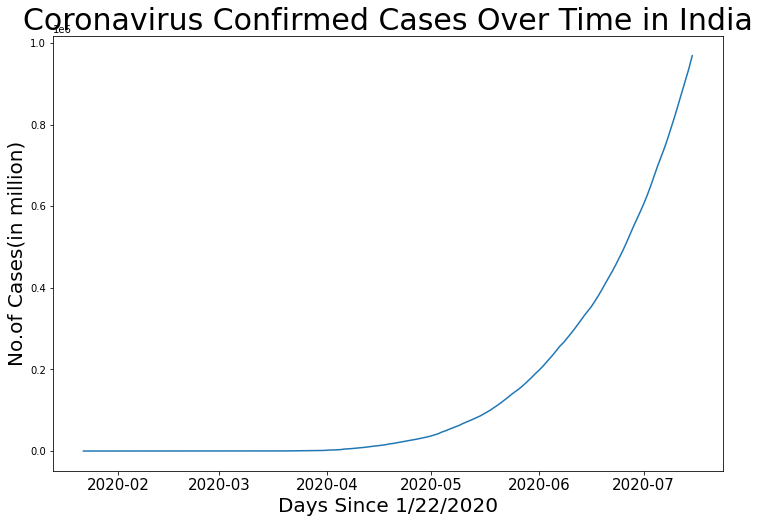

In [ ]:
#Graph for Confirmed Cases in India

plt.figure(figsize=(12, 8))
plt.plot(dates,India_confirmed)
plt.title('Coronavirus Confirmed Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in million)', size=20)
plt.xticks(size=15)
plt.show()

#Prediction


In [ ]:
days_in_future = 15
prediction_days = np.array([i for i in range(len(days)+days_in_future)]).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
prediction_dates = []
for i in range(len(prediction_days)):
    prediction_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
prediction_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

**Confirmed  Cases**

In [ ]:
xtrain_world_confirmed,xtest_world_confirmed,ytrain_world_confirmed,ytest_world_confirmed = train_test_split(days,world_confirmed,test_size=0.35)
xtrain_ind_confirmed,xtest_ind_confirmed,ytrain_ind_confirmed,ytest_ind_confirmed = train_test_split(days,India_confirmed,test_size=0.35)

**Linear Regression**

In [ ]:
accuracy_world=[]
accuracy_india=[]
model=['Linear Regression','Polynomial Regression','Bayesian Ridge','SVR']

In [ ]:
train_world=[]
train_india=[]
test_world=[]
test_india=[]

In [ ]:
# World

lmodel_world_confirmed=LinearRegression()
lmodel_world_confirmed.fit(xtrain_world_confirmed,ytrain_world_confirmed)
lmodel_world_confirmed_test = lmodel_world_confirmed.predict(xtest_world_confirmed)
lmodel_world_confirmed_predict = lmodel_world_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_world_confirmed_test, ytest_world_confirmed))
print('MSE:',metrics.mean_squared_error(lmodel_world_confirmed_test,ytest_world_confirmed))
print('Training score:',lmodel_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed))
print('Testing score:',lmodel_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed))
print('R2 :',metrics.r2_score(lmodel_world_confirmed_test,ytest_world_confirmed))
print('Co-efficient:',lmodel_world_confirmed.coef_)
print('Intercept:',lmodel_world_confirmed.intercept_)
accuracy_world.append((metrics.r2_score(lmodel_world_confirmed_test,ytest_world_confirmed))*100)
train_world.append(lmodel_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed)*100)
test_world.append(lmodel_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed)*100)

MAE: 1289623.5300154903
MSE: 2135638072482.567
Training score: 0.8918398255249828
Testing score: 0.8383201970410649
R2 : 0.856842180860538
Co-efficient: [[76309.14822652]]
Intercept: [-3023270.04186758]


In [ ]:
# India
lmodel_ind_confirmed=LinearRegression()
lmodel_ind_confirmed.fit(xtrain_ind_confirmed,ytrain_ind_confirmed)
lmodel_ind_confirmed_test=lmodel_ind_confirmed.predict(xtest_ind_confirmed)
lmodel_ind_confirmed_predict=lmodel_ind_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_ind_confirmed_test, ytest_ind_confirmed))
print('MSE:',metrics.mean_squared_error(lmodel_ind_confirmed_test,ytest_ind_confirmed))
print('R2 :',metrics.r2_score(lmodel_ind_confirmed_test,ytest_ind_confirmed))
print('Training score:',lmodel_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed))
print('Testing score:',lmodel_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed))
print('Co-efficient:',lmodel_ind_confirmed.coef_)
print('Intercept:',lmodel_ind_confirmed.intercept_)
accuracy_india.append((metrics.r2_score(lmodel_ind_confirmed_test,ytest_ind_confirmed))*100)
train_india.append(lmodel_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed)*100)
test_india.append(lmodel_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed)*100)

MAE: 104468.41472126484
MSE: 15041468166.973852
R2 : 0.602273340706289
Training score: 0.6332510304679957
Testing score: 0.6146575500019357
Co-efficient: [[3979.10011665]]
Intercept: [-194587.35353335]


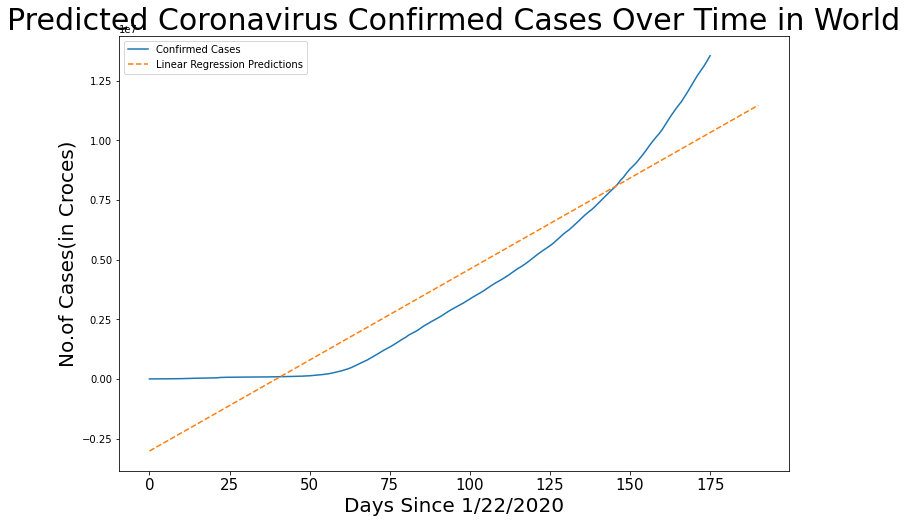

In [ ]:
#Graph for Linear Predicted Confirmed Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_confirmed)
plt.plot(prediction_days,lmodel_world_confirmed_predict,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

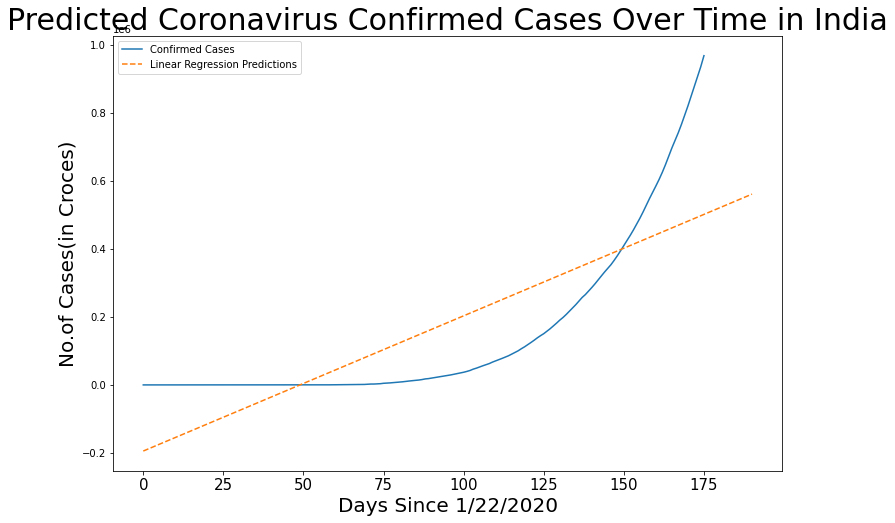

In [ ]:
#Graph for Linear Predicted Confirmed Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_confirmed)
plt.plot(prediction_days,lmodel_ind_confirmed_predict,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
#Prediction Cases in World

lmodel_world_confirmed_predict = lmodel_world_confirmed_predict.reshape(1,-1)[0]
df_world_confirmed_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of Confirmed Cases Worldwide': np.round(lmodel_world_confirmed_predict[-(days_in_future):])})
df_world_confirmed_linear_predict

,Date,Linear Regression Predicted # of Confirmed Cases Worldwide
0,07/16/2020,10407140.0
1,07/17/2020,10483449.0
2,07/18/2020,10559758.0
3,07/19/2020,10636067.0
4,07/20/2020,10712377.0
5,07/21/2020,10788686.0
6,07/22/2020,10864995.0
7,07/23/2020,10941304.0
8,07/24/2020,11017613.0
9,07/25/2020,11093922.0


In [ ]:
#Prediction in India

lmodel_ind_confirmed_predict = lmodel_ind_confirmed_predict.reshape(1,-1)[0]
df_ind_confirmed_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of Confirmed Cases in India': np.round(lmodel_ind_confirmed_predict[-(days_in_future):])})
df_ind_confirmed_linear_predict

,Date,Linear Regression Predicted # of Confirmed Cases in India
0,07/16/2020,505734.0
1,07/17/2020,509713.0
2,07/18/2020,513692.0
3,07/19/2020,517672.0
4,07/20/2020,521651.0
5,07/21/2020,525630.0
6,07/22/2020,529609.0
7,07/23/2020,533588.0
8,07/24/2020,537567.0
9,07/25/2020,541546.0


**Polynomial Regression**

In [ ]:
# To find Best Degree

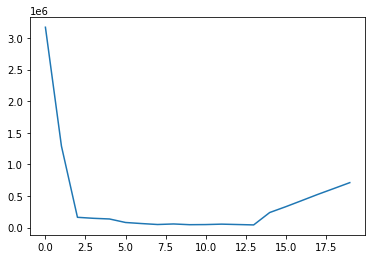

In [ ]:
#World

error_confirmed=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_world_confirmed=pol.fit_transform(xtrain_world_confirmed)
  pol_world_confirmed_test=pol.fit_transform(xtest_world_confirmed)
  lmodel=LinearRegression()
  lmodel.fit(pol_world_confirmed,ytrain_world_confirmed)
  pol_world_confirmed_predict=lmodel.predict(pol_world_confirmed_test)
  e=metrics.mean_absolute_error(pol_world_confirmed_predict,ytest_world_confirmed)
  error_confirmed.append(e)
plt.plot(range(0,20),error_confirmed)
plt.show()

In [ ]:
#best degree=2

In [ ]:
pol=PolynomialFeatures(degree=2)
pol_world_confirmed=pol.fit_transform(xtrain_world_confirmed)
pol_world_confirmed_test=pol.fit_transform(xtest_world_confirmed)
pol_world_confirmed_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_world_confirmed,ytrain_world_confirmed)
pol_world_confirmed_predict=pmodel.predict(pol_world_confirmed_test)
pol_world_confirmed_days=pmodel.predict(pol_world_confirmed_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_world_confirmed_predict, ytest_world_confirmed))
print('MSE:',metrics.mean_squared_error(pol_world_confirmed_predict,ytest_world_confirmed))
print('R2 :',metrics.r2_score(pol_world_confirmed_predict,ytest_world_confirmed))
print('Training score:',pmodel.score(pol_world_confirmed,ytrain_world_confirmed))
print('Testing score:',pmodel.score(pol_world_confirmed_test,ytest_world_confirmed))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)
accuracy_world.append((metrics.r2_score(pol_world_confirmed_predict,ytest_world_confirmed))*100)
train_world.append(pmodel.score(pol_world_confirmed,ytrain_world_confirmed)*100)
test_world.append(pmodel.score(pol_world_confirmed_test,ytest_world_confirmed)*100)

MAE: 161760.39926230448
MSE: 32334729446.065945
R2 : 0.9975429951857351
Training score: 0.9981547615885055
Testing score: 0.9975520792811614
Co-efficient: [[     0.        -31561.5610257    596.0061915]]
Intercept: [329635.11534282]


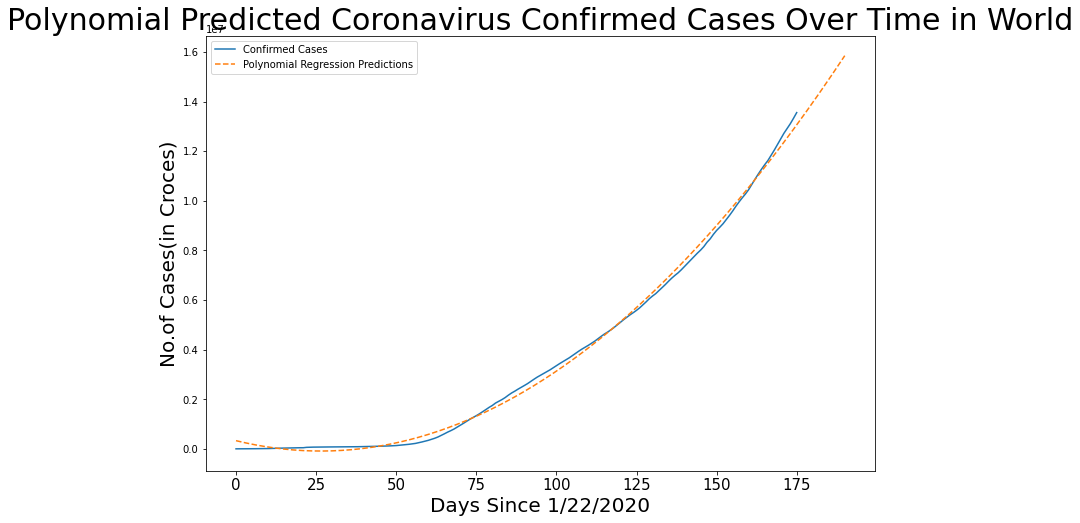

In [ ]:
#Graph for Polynomial Predicted Confirmed Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_confirmed)
plt.plot(prediction_days,pol_world_confirmed_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
#predicted Cases

pol_world_confirmed_days = pol_world_confirmed_days.reshape(1,-1)[0]
df_world_confirmed_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of Confirmed Cases Worldwide': np.round(pol_world_confirmed_days[-(days_in_future):])})
df_world_confirmed_poly_predict

,Date,Polynomial Regression Predicted # of Confirmed Cases Worldwide
0,07/16/2020,13236688.0
1,07/17/2020,13415517.0
2,07/18/2020,13595537.0
3,07/19/2020,13776750.0
4,07/20/2020,13959155.0
5,07/21/2020,14142751.0
6,07/22/2020,14327540.0
7,07/23/2020,14513521.0
8,07/24/2020,14700694.0
9,07/25/2020,14889058.0


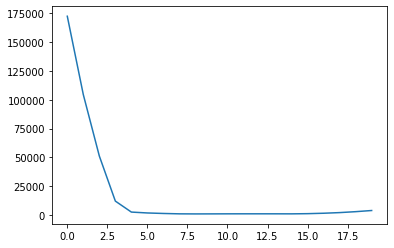

In [ ]:
#India

error_confirmed=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_ind_confirmed=pol.fit_transform(xtrain_ind_confirmed)
  pol_ind_confirmed_test=pol.fit_transform(xtest_ind_confirmed)
  lmodel=LinearRegression()
  lmodel.fit(pol_ind_confirmed,ytrain_ind_confirmed)
  pol_ind_confirmed_predict=lmodel.predict(pol_ind_confirmed_test)
  e=metrics.mean_absolute_error(pol_ind_confirmed_predict,ytest_ind_confirmed)
  error_confirmed.append(e)
plt.plot(range(0,20),error_confirmed)
plt.show()

In [ ]:
#best Degree=4

In [ ]:
pol=PolynomialFeatures(degree=4)
pol_ind_confirmed=pol.fit_transform(xtrain_ind_confirmed)
pol_ind_confirmed_test=pol.fit_transform(xtest_ind_confirmed)
pol_ind_confirmed_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_ind_confirmed,ytrain_ind_confirmed)
pol_ind_confirmed_predict=pmodel.predict(pol_ind_confirmed_test)
pol_ind_confirmed_days=pmodel.predict(pol_ind_confirmed_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_ind_confirmed_predict, ytest_ind_confirmed))
print('MSE:',metrics.mean_squared_error(pol_ind_confirmed_predict,ytest_ind_confirmed))
print('R2 :',metrics.r2_score(pol_ind_confirmed_predict,ytest_ind_confirmed))
print('Training score:',pmodel.score(pol_ind_confirmed,ytrain_ind_confirmed))
print('Testing score:',pmodel.score(pol_ind_confirmed_test,ytest_ind_confirmed))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)
accuracy_india.append((metrics.r2_score(pol_ind_confirmed_predict,ytest_ind_confirmed))*100)
train_india.append(pmodel.score(pol_ind_confirmed,ytrain_ind_confirmed)*100)
test_india.append(pmodel.score(pol_ind_confirmed_test,ytest_ind_confirmed)*100)

MAE: 2352.7016869790614
MSE: 8660468.068978712
R2 : 0.9997794955271667
Training score: 0.9998073622774277
Testing score: 0.9997781303030538
Co-efficient: [[ 0.00000000e+00 -9.48958025e+02  3.72902465e+01 -5.65492283e-01
   3.20419257e-03]]
Intercept: [5705.41778368]


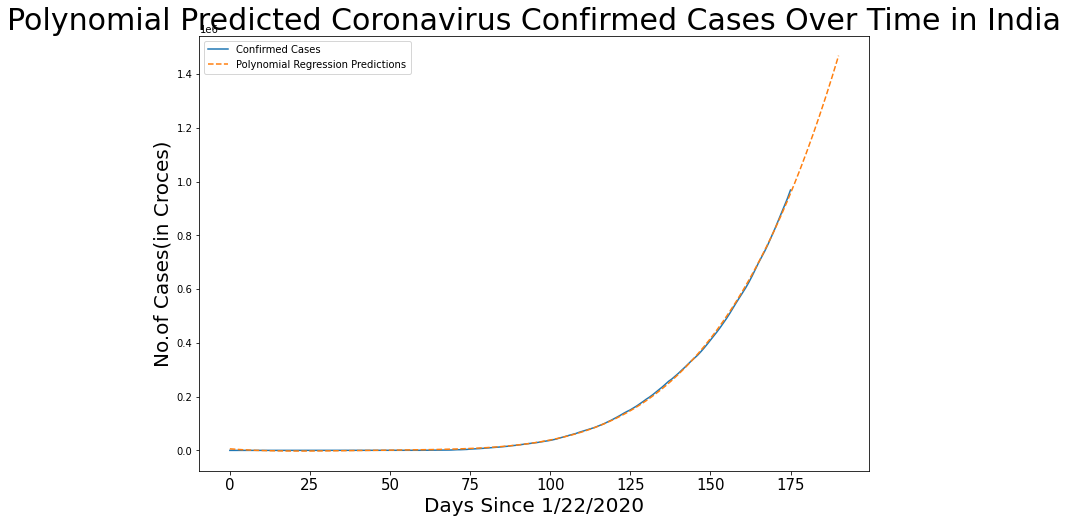

In [ ]:
#Graph for Polynomial Predicted Confirmed Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_confirmed)
plt.plot(prediction_days,pol_ind_confirmed_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus Confirmed Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
#predicted Cases in India

pol_ind_confirmed_days = pol_ind_confirmed_days.reshape(1,-1)[0]
df_ind_confirmed_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of Confirmed Cases India': np.round(pol_ind_confirmed_days[-(days_in_future):])})
df_ind_confirmed_poly_predict

,Date,Polynomial Regression Predicted # of Confirmed Cases India
0,07/16/2020,985317.0
1,07/17/2020,1015155.0
2,07/18/2020,1045670.0
3,07/19/2020,1076875.0
4,07/20/2020,1108779.0
5,07/21/2020,1141393.0
6,07/22/2020,1174727.0
7,07/23/2020,1208791.0
8,07/24/2020,1243597.0
9,07/25/2020,1279155.0


In [ ]:
#Bayesian Ridge

In [ ]:
#To get Best Parameters

reg_world_confirm=BayesianRidge()
reg_world_confirm.fit(xtrain_world_confirmed,ytrain_world_confirmed)
print(reg_world_confirm.get_params)

<bound method BaseEstimator.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#World

reg_world_confirmed=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_world_confirmed.fit(xtrain_world_confirmed,ytrain_world_confirmed)
reg_world_confirmed_test = reg_world_confirmed.predict(xtest_world_confirmed)
reg_world_confirmed_predict_days = reg_world_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_world_confirmed_test, ytest_world_confirmed))
print('MSE:',metrics.mean_squared_error(reg_world_confirmed_test, ytest_world_confirmed))
print('R2 :',metrics.r2_score(reg_world_confirmed_test, ytest_world_confirmed))
print('Training score:',reg_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed))
print('Testing score:',reg_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed))
accuracy_world.append((metrics.r2_score(reg_world_confirmed_test, ytest_world_confirmed))*100)
train_world.append(reg_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed)*100)
test_world.append(reg_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed)*100)

MAE: 1288210.6185647221
MSE: 2131460763281.1772
R2 : 0.8568150145482651
Training score: 0.8918387982357577
Testing score: 0.8386364428213221


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


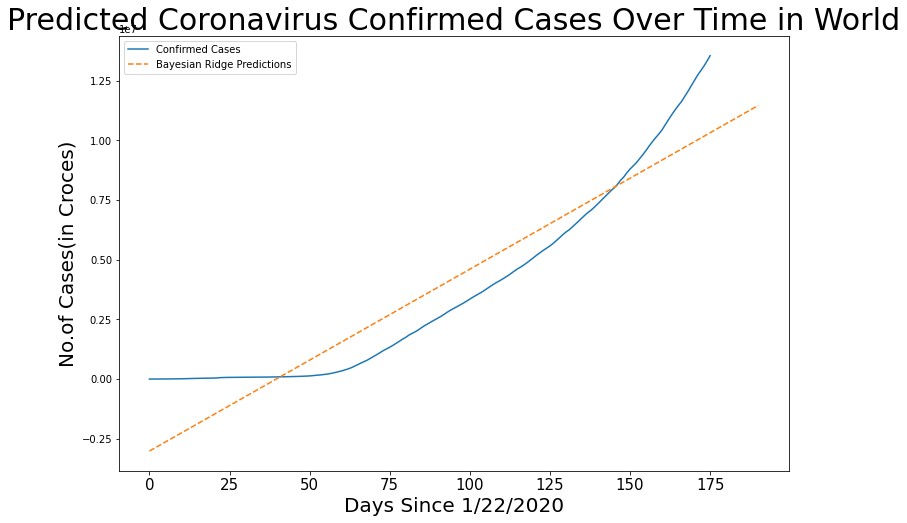

In [ ]:
#Graph for Bayesian Predicted Confirmed Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_confirmed)
plt.plot(prediction_days,reg_world_confirmed_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_world_confirmed_predict_days = reg_world_confirmed_predict_days.reshape(1,-1)[0]
df_world_confirmed_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(reg_world_confirmed_predict_days[-(days_in_future):])})
df_world_confirmed_reg_predict

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,07/16/2020,10400150.0
1,07/17/2020,10476377.0
2,07/18/2020,10552604.0
3,07/19/2020,10628832.0
4,07/20/2020,10705059.0
5,07/21/2020,10781286.0
6,07/22/2020,10857513.0
7,07/23/2020,10933741.0
8,07/24/2020,11009968.0
9,07/25/2020,11086195.0


In [ ]:
#To get Parameters

reg_ind_confirm=BayesianRidge()
reg_ind_confirm.fit(xtrain_ind_confirmed,ytrain_ind_confirmed)
print(reg_ind_confirm.get_params)

<bound method BaseEstimator.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#India

reg_ind_confirmed=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_ind_confirmed.fit(xtrain_ind_confirmed,ytrain_ind_confirmed)
reg_ind_confirmed_test = reg_ind_confirmed.predict(xtest_ind_confirmed)
reg_ind_confirmed_predict_days = reg_ind_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_ind_confirmed_test, ytest_ind_confirmed))
print('MSE:',metrics.mean_squared_error(reg_ind_confirmed_test, ytest_ind_confirmed))
print('R2 :',metrics.r2_score(reg_ind_confirmed_test, ytest_ind_confirmed))
print('Training score:',reg_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed))
print('Testing score:',reg_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed))
accuracy_india.append((metrics.r2_score(reg_ind_confirmed_test, ytest_ind_confirmed))*100)
train_india.append(reg_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed)*100)
test_india.append(reg_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed)*100)

MAE: 104106.05078124946
MSE: 14977661490.26632
R2 : 0.5998694869706129
Training score: 0.6332343960831793
Testing score: 0.6162921923690087


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


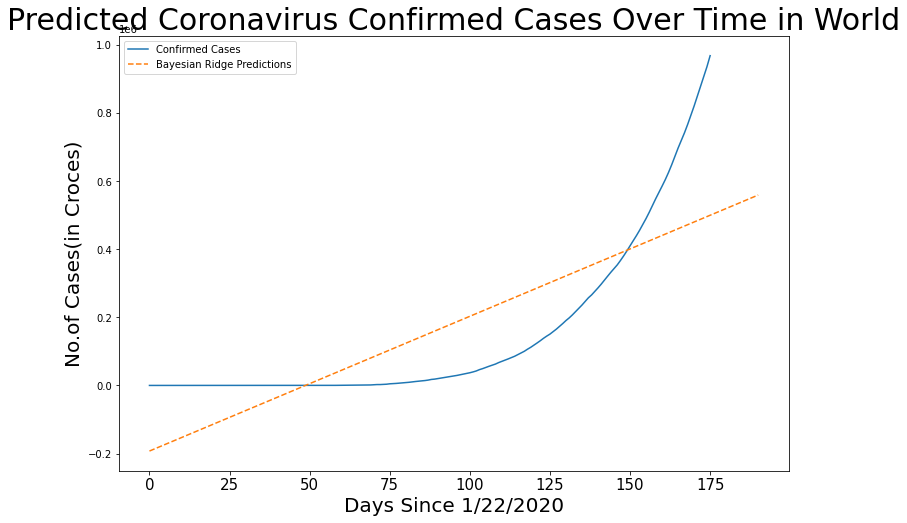

In [ ]:
#Graph for Bayesian Predicted Confirmed Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_confirmed)
plt.plot(prediction_days,reg_ind_confirmed_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_ind_confirmed_predict_days = reg_ind_confirmed_predict_days.reshape(1,-1)[0]
df_ind_confirmed_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of Confirmed Cases India': np.round(reg_ind_confirmed_predict_days[-(days_in_future):])})
df_ind_confirmed_reg_predict

,Date,Bayesian Ridge Predicted # of Confirmed Cases India
0,07/16/2020,503990.0
1,07/17/2020,507948.0
2,07/18/2020,511907.0
3,07/19/2020,515866.0
4,07/20/2020,519824.0
5,07/21/2020,523783.0
6,07/22/2020,527742.0
7,07/23/2020,531700.0
8,07/24/2020,535659.0
9,07/25/2020,539618.0


In [ ]:
#SVM 

In [ ]:
#World

svm_world_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_world_confirmed.fit(xtrain_world_confirmed, ytrain_world_confirmed)
svm_world_confirmed_predict = svm_world_confirmed.predict(xtest_world_confirmed)
svm_world_confirmed_predict_days=svm_world_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_world_confirmed_predict, ytest_world_confirmed))
print('MSE:',metrics.mean_squared_error(svm_world_confirmed_predict, ytest_world_confirmed))
print('R2 :',metrics.r2_score(svm_world_confirmed_predict, ytest_world_confirmed))
print('Training score:',svm_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed))
print('Testing score:',svm_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed))
accuracy_world.append((metrics.r2_score(svm_world_confirmed_predict, ytest_world_confirmed))*100)
train_world.append(svm_world_confirmed.score(xtrain_world_confirmed,ytrain_world_confirmed)*100)
test_world.append(svm_world_confirmed.score(xtest_world_confirmed,ytest_world_confirmed)*100)

MAE: 300659.4888845649
MSE: 161511907697.32928
R2 : 0.9874289266560392
Training score: 0.991716952369696
Testing score: 0.9877726409973248


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


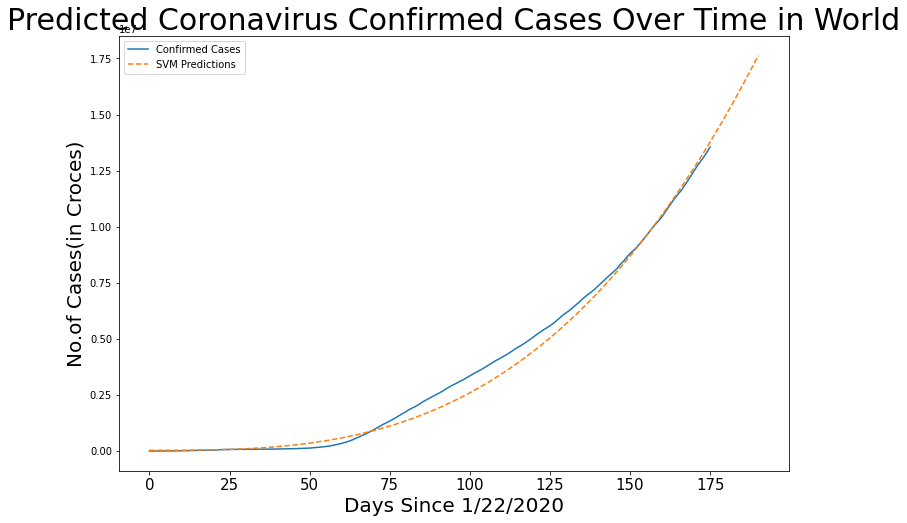

In [ ]:
#Graph for SVM Predicted Confirmed Cases in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_confirmed)
plt.plot(prediction_days,svm_world_confirmed_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_world_confirmed_predict_days = svm_world_confirmed_predict_days.reshape(1,-1)[0]
df_world_confirmed_svm_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_world_confirmed_predict_days[-(days_in_future):])})
df_world_confirmed_svm_predict

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,07/16/2020,14015113.0
1,07/17/2020,14254800.0
2,07/18/2020,14497211.0
3,07/19/2020,14742360.0
4,07/20/2020,14990265.0
5,07/21/2020,15240939.0
6,07/22/2020,15494398.0
7,07/23/2020,15750658.0
8,07/24/2020,16009734.0
9,07/25/2020,16271641.0


In [ ]:
#India

svm_ind_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_ind_confirmed.fit(xtrain_ind_confirmed, ytrain_ind_confirmed)
svm_ind_confirmed_predict = svm_ind_confirmed.predict(xtest_ind_confirmed)
svm_ind_confirmed_predict_days=svm_ind_confirmed.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_ind_confirmed_predict, ytest_ind_confirmed))
print('MSE:',metrics.mean_squared_error(svm_ind_confirmed_predict, ytest_ind_confirmed))
print('R2 :',metrics.r2_score(svm_ind_confirmed_predict, ytest_ind_confirmed))
print('Training score:',svm_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed))
print('Testing score:',svm_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed))
accuracy_india.append((metrics.r2_score(svm_ind_confirmed_predict, ytest_ind_confirmed))*100)
train_india.append(svm_ind_confirmed.score(xtrain_ind_confirmed,ytrain_ind_confirmed)*100)
test_india.append(svm_ind_confirmed.score(xtest_ind_confirmed,ytest_ind_confirmed)*100)

MAE: 40359.80052163206
MSE: 2676021885.6390233
R2 : 0.9216495399793692
Training score: 0.911753059479469
Testing score: 0.9314438711558273


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


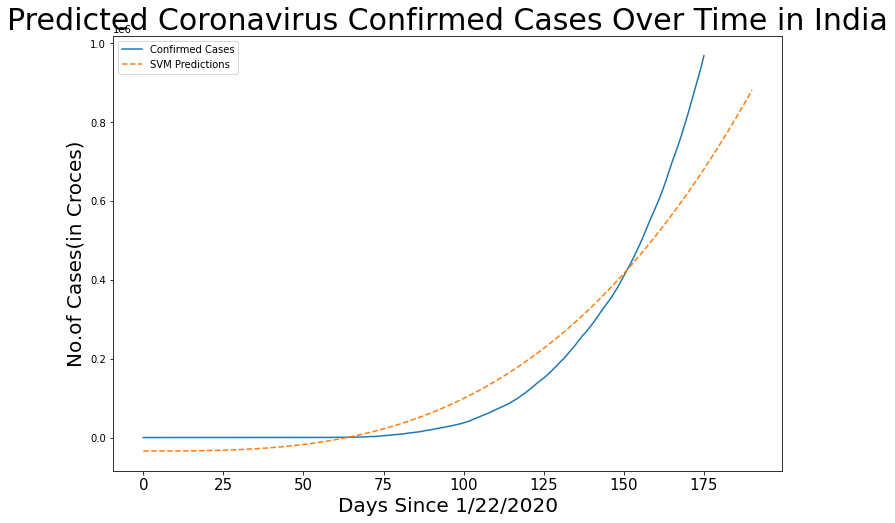

In [ ]:
#Graph for SVM Predicted Confirmed Cases in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_confirmed)
plt.plot(prediction_days,svm_ind_confirmed_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus Confirmed Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_ind_confirmed_predict_days = svm_ind_confirmed_predict_days.reshape(1,-1)[0]
df_ind_confirmed_svm1_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of Confirmed Cases India': np.round(svm_ind_confirmed_predict_days[-(days_in_future):])})
df_ind_confirmed_svm1_predict

,Date,SVM Predicted # of Confirmed Cases India
0,07/16/2020,693410.0
1,07/17/2020,705884.0
2,07/18/2020,718500.0
3,07/19/2020,731258.0
4,07/20/2020,744160.0
5,07/21/2020,757206.0
6,07/22/2020,770397.0
7,07/23/2020,783734.0
8,07/24/2020,797217.0
9,07/25/2020,810847.0


In [ ]:
#Bar Graph
wid=0.25

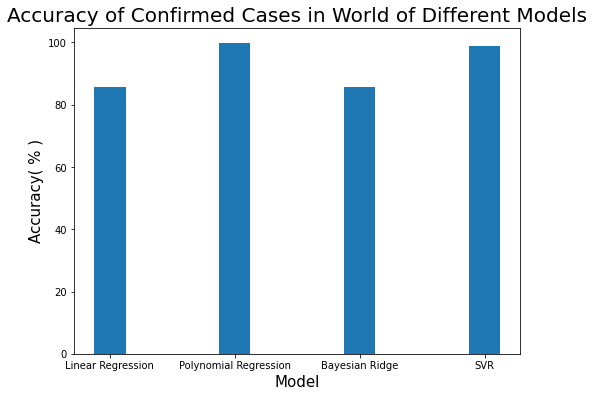

In [ ]:
#Accuracy of World

plt.figure(figsize=(8,6))
plt.bar(model,accuracy_world,width=wid)
plt.title('Accuracy of Confirmed Cases in World of Different Models',size=20)
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy( % )',size=15)
plt.show()

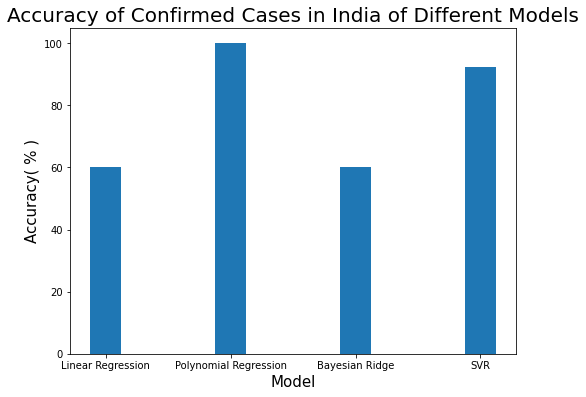

In [ ]:
#Accuracy of India

plt.figure(figsize=(8,6))
plt.bar(model,accuracy_india,width=wid)
plt.title('Accuracy of Confirmed Cases in India of Different Models',size=20)
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy( % )',size=15)
plt.show()

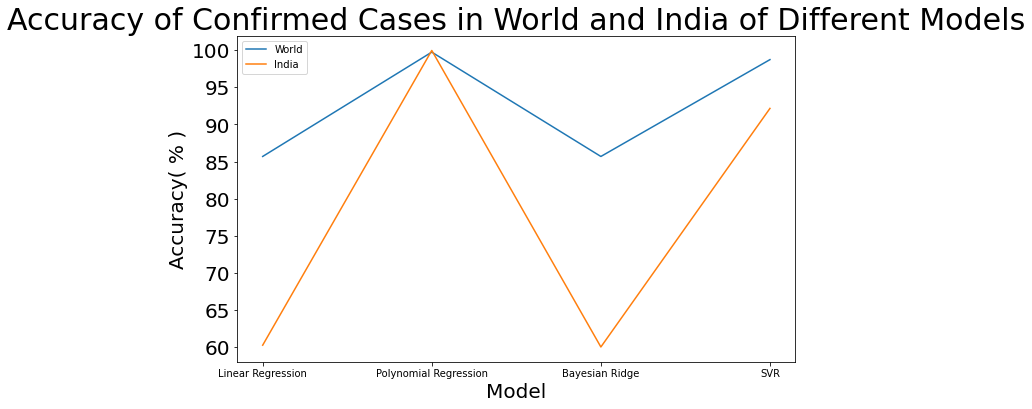

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model,accuracy_world)
plt.plot(model,accuracy_india)
plt.title('Accuracy of Confirmed Cases in World and India of Different Models', size=30)
plt.xlabel('Model', size=20)
plt.ylabel('Accuracy( % )', size=20)
plt.legend(['World', 'India'])
plt.yticks(size=20)
plt.show()

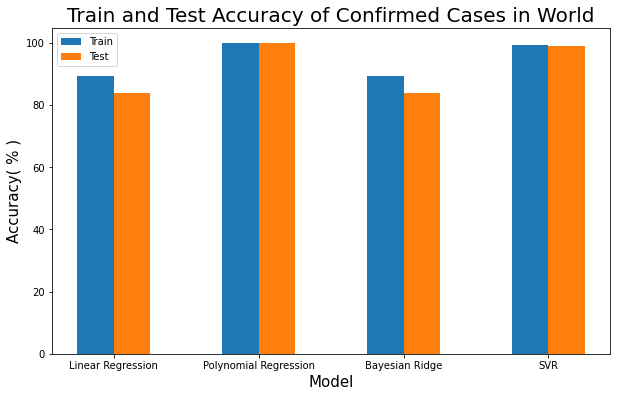

In [ ]:
#Group plots for Train,Test Of World

wid=0.25
world1=np.arange(len(train_world))
plt.figure(figsize=(10,6))
plt.bar(world1, train_world, width=wid)
plt.bar(world1+wid,test_world, width=wid)
plt.title('Train and Test Accuracy of Confirmed Cases in World',size=20)
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy( % )',size=15)
plt.xticks((world1+wid/2),model)
plt.legend(['Train','Test'])
plt.show()

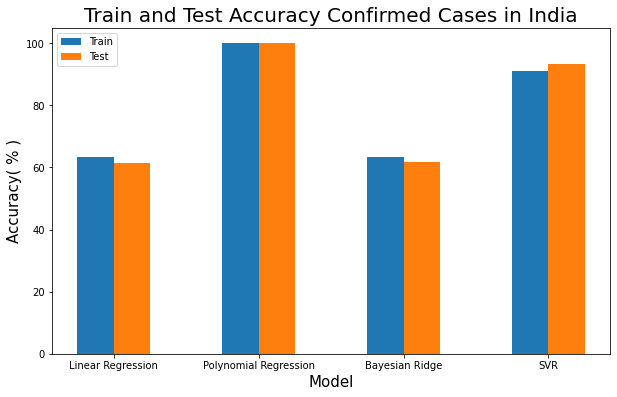

In [ ]:
#Group Bar plots for India

ind1=np.arange(len(train_india))
plt.figure(figsize=(10,6))
plt.bar(model, train_india, width=wid)
plt.bar(ind1+wid,test_india, width=wid)
plt.title('Train and Test Accuracy Confirmed Cases in India',size=20)
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy( % )',size=15)
plt.xticks(ind1+wid/2,model)
plt.legend(['Train','Test'])
plt.show()